<a href="https://colab.research.google.com/github/rguezzdani/Visualizacion---Actividades-guiadas/blob/master/Seminario_VentasVideojuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

In [0]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [39]:
df = upload_files()
df.head()

Saving vgsales.csv to vgsales (1).csv
User uploaded file "vgsales.csv" with length 1355781 bytes


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


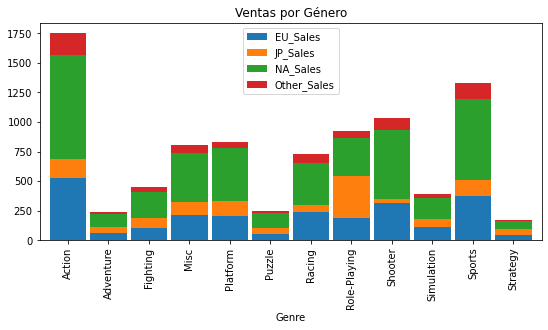

In [41]:
df2 = df[['Genre', 'EU_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales']]
df2 = df2.groupby(['Genre']).sum()

df2.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 1,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4),
             title='Ventas por Género');            # Cambiamos el tamaño de la figura



In [0]:
df.drop(["Rank", 'Name', 'Genre', 'Publisher', 'Global_Sales'], axis = 1, inplace=True)

In [0]:
df = df.ffill(axis=0)

In [44]:
df15 = df[df['Year'] == 2015]
df16 = df[df['Year'] == 2016]
df17 = df[df['Year'] == 2017]

dataframes = [df15,df16,df17]
df3 = pd.concat(dataframes)
df3

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
33,PS4,2015.0,5.77,5.81,0.35,2.31
77,PS4,2015.0,1.11,6.06,0.06,1.26
92,PS4,2015.0,2.93,3.29,0.22,1.23
101,XOne,2015.0,4.52,2.09,0.01,0.67
109,PS4,2015.0,2.47,3.15,0.24,1.10
...,...,...,...,...,...,...
16576,XOne,2016.0,0.00,0.01,0.00,0.00
16589,PSV,2016.0,0.00,0.00,0.01,0.00
14390,PS4,2017.0,0.00,0.00,0.03,0.00
16241,PSV,2017.0,0.00,0.00,0.01,0.00


In [0]:
df3.drop(['Year'], axis = 1, inplace=True)

In [73]:
df = df3.groupby('Platform').sum()
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,0.44,0.03,0.00,0.00
3DS,6.65,5.34,20.42,1.11
PC,3.05,6.87,0.00,0.72
PS,0.05,0.03,0.00,0.01
PS2,0.14,0.11,0.00,0.04
PS3,5.16,8.40,4.80,2.62
PS4,52.62,67.91,10.45,23.59
PSP,0.00,0.00,0.12,0.00
PSV,0.73,1.58,7.54,0.62


In [0]:
dfjapan = df['JP_Sales']
dfna = df['NA_Sales']
dfeu = df['EU_Sales']
dfother = df['Other_Sales']

In [0]:
dfjapan = dfjapan.sort_values(ascending = False).head(3)
dfna = dfna.sort_values(ascending = False).head(3)
dfeu = dfeu.sort_values(ascending = False).head(3)
dfother = dfother.sort_values(ascending = False).head(3)

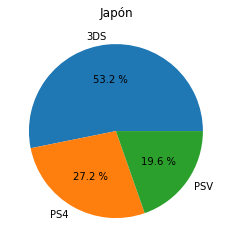

In [87]:
plt.pie(dfjapan, labels=dfjapan.index, autopct="%0.1f %%")
plt.title('Japón')
plt.show()

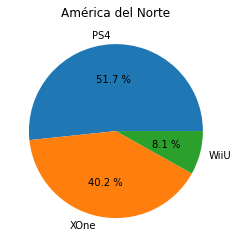

In [88]:
plt.pie(dfna, labels=dfna.index, autopct="%0.1f %%")
plt.title('América del Norte')
plt.show()

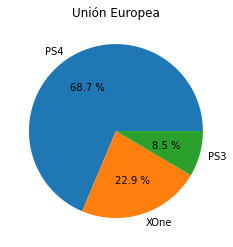

In [89]:
plt.pie(dfeu, labels=dfeu.index, autopct="%0.1f %%")
plt.title('Unión Europea')
plt.show()

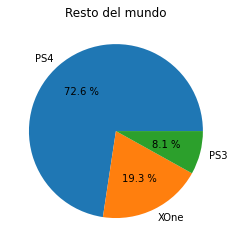

In [90]:
plt.pie(dfother, labels=dfother.index, autopct="%0.1f %%")
plt.title('Resto del mundo')
plt.show()